<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="45%"><img src="../media/Univ-Utah.jpeg"><br>
</td>
    <td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">University of Utah<br>Population Health Sciences<br>Data Science Workshop</font></h1></td>
<td valign="center" align="center" width="45%"><img
src="../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>


In [1]:
import pandas as pd
from helpers import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [25]:
conn = connect_to_mimic()

Enter password for MIMIC2 database········


# Labs and Vitals
In the last two notebooks, we focused mainly on categorical data elements such as patient ethnicity and diagnoses. In this notebook we'll start looking at more numeric variables: lab results and patient vitals.

## I. Labs
Lab tests are used for diagnostic purposes. In MIMIC, the lab measurements are stored in `labevents`. Let's look at the first 10 rows of this table:

In [6]:
query = """SELECT * FROM labevents LIMIT 10;"""
df = pd.read_sql(query, conn)
df.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,icustay_id,itemid,charttime,value,valuenum,flag,valueuom
0,56,28766,None,50124,2644-01-17 00:30:00,HOLD,NaN,None,None
1,56,28766,None,50112,2644-01-17 00:30:00,155,155.0,abnormal,mg/dL
2,56,28766,None,50177,2644-01-17 00:30:00,21,21.0,abnormal,mg/dL
3,56,28766,None,50090,2644-01-17 00:30:00,0.7,0.7,None,mg/dL
4,56,28766,None,50159,2644-01-17 00:30:00,128,128.0,abnormal,mEq/L


To understand what these values are, we'll need to turn to another terminology called **LOINC**. [**LOINC**](https://en.wikipedia.org/wiki/LOINC) is a standardized terminology representing laboratory tests and microbiology tests. Just like how we used ICD-9 codes to study patient diagnoses, we'll now loook at LOINC codes to study lab tests.

Metadata about the tests, such as a LOINC code and description, are stored in a separate table called `d_labitems`. As we discussed earlier today, this is common in relational database modeling since it means we don't need to store the name of the test every single time. Let's look at the first 10 rows of `d_labitems`. Note that there is information about the test, but no actual results.

In [9]:
query = """SELECT * FROM d_labitems LIMIT 10;"""
df = pd.read_sql(query, conn)
df.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,itemid,test_name,fluid,category,loinc_code,loinc_description
0,50001,AADO2,BLOOD,BLOOD GAS,19991-9,Oxygen.alveolar - arterial [Partial pressure] ...
1,50002,BASE XS,BLOOD,BLOOD GAS,11555-0,Base excess in Blood
2,50003,CARBOXYHB,BLOOD,BLOOD GAS,20563-3,Carboxyhemoglobin/Hemoglobin.total in Blood
3,50004,CL-,BLOOD,BLOOD GAS,2069-3,Chloride [Moles/volume] in Blood
4,50006,GLUCOSE,BLOOD,BLOOD GAS,2339-0,Glucose [Mass/volume] in Blood


To get the test metadata along with the test results, we can join these two tables together using the `itemid` column. 

#### TODO
Finish the query below to get all lab results, along with the metadata about the tests, for hospital admission `28766`. Save the result as `labs_28766`.

In [14]:
query = """
SELECT * 
FROM labevents
    INNER JOIN d_labitems
        ON labevents.itemid = d_labitems.itemid
WHERE hadm_id = 28766;
"""
labs_28766 = pd.read_sql(query, conn)
labs_28766.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,icustay_id,itemid,charttime,value,valuenum,flag,valueuom,itemid,test_name,fluid,category,loinc_code,loinc_description
0,56,28766,NaN,50124,2644-01-17 00:30:00,HOLD,NaN,None,None,50124,HOLD BLUE,BLOOD,CHEMISTRY,None,None
1,56,28766,NaN,50112,2644-01-17 00:30:00,155,155.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
2,56,28766,NaN,50177,2644-01-17 00:30:00,21,21.0,abnormal,mg/dL,50177,UREA N,BLOOD,CHEMISTRY,3094-0,Urea nitrogen [Mass/volume] in Serum or Plasma
3,56,28766,NaN,50090,2644-01-17 00:30:00,0.7,0.7,None,mg/dL,50090,CREAT,BLOOD,CHEMISTRY,2160-0,Creatinine [Mass/volume] in Serum or Plasma
4,56,28766,NaN,50159,2644-01-17 00:30:00,128,128.0,abnormal,mEq/L,50159,SODIUM,BLOOD,CHEMISTRY,2951-2,Sodium [Moles/volume] in Serum or Plasma


In [21]:
# query = """
# SELECT * 
# FROM labevents
#     ____ ____ d_labitems
#         ON labevents.____ = ____.itemid
# WHERE hadm_id = ____;
# """
# labs_28766 = pd.read_sql(query, conn)
# labs_28766.head()

In [22]:
# RUN CELL TO TEST VALUE
test_labs_28766.test(labs_28766)

That is correct!


Let's focus on a specific lab test. We'll look at the LOINC code [2345-7](https://loinc.org/2345-7/), which measures the amount of glucose in a patient's blood. This test is relevant for testing whether a patient has diabetes. Here is a description from the LOINC website:
***
<strong>
Glucose (C6H12O6) is a simple monosaccharide and monomer of carbohydrates. Glucose provides energy for cellular processes and aids metabolism within the body. When food is ingested, the carbohydrates within the food are broken down into glucose molecules. Blood glucose content is significant in determining an individual's overall state of health. An elevated blood glucose level is called hyperglycemia and a deficient blood glucose level is called hypoglycemia. When an individual is hyperglycemic and cannot properly regulate their blood glucose level they are considered diabetic. Type 1 diabetes is caused by the immune system attacking pancreatic beta cells (cells that produce insulin) and Type 2 diabetes is caused by insulin resistance. [MedlinePlus Encyclopedia:003482]
</strong>
***

Let's specifically analyze the results of this test and generate some descriptive statistics. 

#### TODO
3. Using Python, select the first 10,000 rows. Call the resulting DataFrame `glucose`
4. Generate descriptive statistics of the DataFrame
5. Generate a box plot with Seaborn

#### TODO
Join `labevents` and `d_labitems` and filter to rows where the LOINC code is **'2345-7'**. Limit to 10 rows to get a preview

In [24]:
query = """
SELECT * 
FROM labevents
    INNER JOIN d_labitems
        ON labevents.itemid = d_labitems.itemid
WHERE loinc_code = '2345-7'
LIMIT 10;
"""
pd.read_sql(query, conn)


/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,icustay_id,itemid,charttime,value,valuenum,flag,valueuom,itemid,test_name,fluid,category,loinc_code,loinc_description
0,56,28766.0,NaN,50112,2644-01-17 00:30:00,155,155.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
1,56,28766.0,62.0,50112,2644-01-17 03:57:00,146,146.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
2,56,28766.0,62.0,50112,2644-01-18 03:30:00,140,140.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
3,56,28766.0,NaN,50112,2644-01-19 12:40:00,108,108.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
4,37,18052.0,NaN,50112,3264-08-14 06:00:00,303,303.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
5,37,18052.0,NaN,50112,3264-08-15 06:00:00,225,225.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
6,37,18052.0,41.0,50112,3264-08-16 11:33:00,265,265.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
7,37,18052.0,41.0,50112,3264-08-17 04:00:00,74,74.0,None,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
8,37,18052.0,NaN,50112,3264-08-18 08:35:00,154,154.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma
9,37,NaN,NaN,50112,3265-04-21 13:15:00,438,438.0,abnormal,mg/dL,50112,GLUCOSE,BLOOD,CHEMISTRY,2345-7,Glucose [Mass/volume] in Serum or Plasma


In [28]:
# RUN CELL TO SEE QUIZ
quiz_category_glucose

The numeric value of the test result is stored in the column `valuenum` (not `value` - what do you think the difference is?)
#### TODO
Select the `COUNT`, `MIN`, `MAX`, and `AVG` values of `2345-7`.

In [35]:
query = """
SELECT COUNT(*), MIN(valuenum), MAX(valuenum), AVG(VALUENUM)
    FROM labevents
    INNER JOIN d_labitems
        ON labevents.itemid = d_labitems.itemid
WHERE loinc_code = '2345-7'
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COUNT(*),MIN(valuenum),MAX(valuenum),AVG(VALUENUM)
0,97499,4.0,2516.0,134.326044


In [34]:
# RUN CELL TO SEE QUIZ
quiz_avg_glucose

Let's do some more detailed analysis using `pandas`. Because `labevents` is a big table, let's take a random sample of glucose tests. One way that we can take a random sample in SQL is by ording the results by a random number using the `RAND()` function and then limiting the results to the number we want to sample:

```sql
ORDER BY RAND()
LIMIT k
```


#### TODO
Write a query which returns the `subject_id`, `hadm_id`, `valuenum`, `flag`, and `flag` columns for a random sample of 1,000 glucose tests from MIMIC. Save the result as `glucose`.

In [83]:
query = """
SELECT subject_id, hadm_id, valuenum, flag
FROM labevents
    INNER JOIN d_labitems
        ON labevents.itemid = d_labitems.itemid
WHERE loinc_code = '2345-7'
ORDER BY RAND()
LIMIT 1000;
"""
glucose = pd.read_sql(query, conn)
glucose.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,valuenum,flag
0,13168,14527.0,141.0,abnormal
1,7524,26203.0,124.0,abnormal
2,22228,27478.0,148.0,abnormal
3,23786,3657.0,82.0,None
4,25030,5557.0,162.0,abnormal


#### TODO
Earlier we used SQL to calculate some summary statistics of the `valuenum` for all 2345-7 tests. Now use `pandas` to calculate summary statistics for your random sample. Are they similar to the values of the entire table? 

In [67]:
# RUN CELL TO SEE QUIZ
hint_summary_glucose

In [65]:
glucose["valuenum"].describe()

count    1000.000000
mean      134.077000
std        72.456656
min        22.000000
25%        95.000000
50%       121.000000
75%       150.000000
max      1293.000000
Name: valuenum, dtype: float64

#### TODO
Create a plot visualizing the results in your sample of glucose tests.

In [62]:
# RUN CELL TO SEE HINT
hint_viz_glucose

###  Flag attribute
Unless you're a clinician, the `valuenum` probably doesn't tell you much about the meaning of the test result. The `flag` column is there to tell us whether the test was outside the expected range. An `abnormal` value may be interpreted as a positive result.


#### TODO
The code below shows all distinct values for the `flag` column. What do you think a value of `None` means?

In [84]:
set(glucose["flag"])

{None, 'abnormal'}

In [76]:
# RUN CELL TO SEE QUIZ
quiz_none_glucose

### Replacing missing values
The `None` values above are examples of **missing values**. Missing values can mean different things, so you need to be careful about how you handle missing them. In this, since the only values are `None` and `abnormal`, it's pretty clear that this column only contains a string value if the flag is **"abnormal"** and is `NULL` (the SQL equivalent of `None`) otherwise. 

We will want to fill these nulls  with the value **"normal"**. Let's do this first in SQL and then in Python.

### Replacing NULL with SQL
We can fill these null values in our SQL query by using the `coalesce` function. This will take the first non-null value in a list. So, for example,

`coalesce(null, 'world!')` would return 'world!', while `coalesce('hello,', null)` would return 'hello'.

#### TODO
What would `coalesce('hello', 'world')` return?

In [81]:
# RUN CELL TO SEE QUIZ
quiz_coalesce_helloworld = MultipleChoiceQuiz(answer="'hello'", options=["'hello'", "'world'", "NULL"])
quiz_coalesce_helloworld

#### TODO
Edit the query below so that SQL will return the value of the column `flag` if it is not null and will return `'normal'` otherwise. Take a random sample of 100 rows and save it as `glucose2`

In [85]:
query = """
SELECT subject_id, hadm_id, valuenum, COALESCE(flag, 'normal') flag
FROM labevents
    INNER JOIN d_labitems
        ON labevents.itemid = d_labitems.itemid
WHERE loinc_code = '2345-7'
ORDER BY RAND()
LIMIT 100;
"""
glucose2 = pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [94]:
# RUN CELL TO SEE QUIZ
test_glucose_coalesce.test(glucose2)

That is correct!


In [89]:
glucose2

,subject_id,hadm_id,valuenum,flag
0,18961,12162.0,539.0,abnormal
1,23083,27024.0,150.0,abnormal
2,9082,NaN,112.0,abnormal
3,13599,NaN,187.0,abnormal
4,16186,12747.0,52.0,abnormal
...,...,...,...,...
95,19006,1251.0,119.0,abnormal
96,6659,3374.0,98.0,normal
97,14457,4896.0,85.0,normal
98,21447,22910.0,269.0,abnormal


### Replacing missing values in `pandas`
We can also fill in missing values directly in our dataframe. The method `Series.fillna(new_value)` returns a new series with all missing values filled in with `new_value`. We can then reassign the column to this new, non-missing column.

#### TODO
Edit the code below so all missing values of the `flag` of `glucose` are filled in with `normal`.

In [95]:
glucose["flag"] = glucose["flag"].fillna("normal")

In [ ]:
glucose[____] = ____["flag"].fillna(____)

In [96]:
test_glucose_coalesce.test(glucose)

That is correct!


Now that we've filled in the missing values of `flag`, let's compare the distribution of `valuenum` between normal and abnormal results.

#### TODO
First calculate summary statistics of `glucose["valuenum"]` stratified by `flag`. Then create a visualization comparing the distributions in the two groups.

In [107]:
hint_summary_glucose = QuizHint(hints=[
    widgets.HTML("""Your output could look something like this:</br>
    <img src="./media/hint_output_glucose_value_by_flag.png" width="50%">
    """)
])
hint_summary_glucose

In [101]:
glucose.groupby("flag")["valuenum"].describe()

,count,mean,std,min,25%,50%,75%,max
flag,,,,,,,,
abnormal,713.0,152.14446,61.772577,22.0,117.0,138.0,171.0,696.0
normal,287.0,91.30662,8.896652,70.0,84.5,92.0,98.0,105.0


<AxesSubplot:xlabel='flag', ylabel='valuenum'>

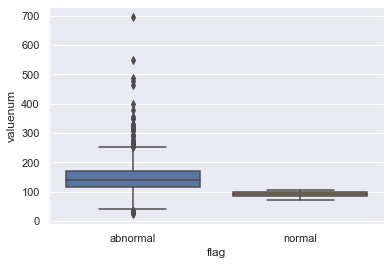

In [102]:
sns.boxplot(x="flag", y="valuenum", data=glucose)

## II. Vital Signs
The `chartevents` table in MIMIC-II contains vitals measurements. The table `d_chartitems` defines what these measurements represents. Let's look at what the first 25 alphabetical vital measurements are:

In [4]:
query = """
SELECT 
    DISTINCT d_chartitems.label
FROM d_chartitems
LIMIT 25;
"""
df = pd.read_sql(query, conn)
df

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,label
0,% Inspir. Time
1,ABI (L)
2,ABI (R)
3,ABI Ankle BP R/L
4,ABI Brachial BP R/L
5,ABP
6,ART Lumen Volume
7,AV Interval
8,AaDO2
9,Abdominal Assessment


Now let's query the first 100 rows from `chartevents` to see what some actual measurements look like:

In [7]:
query = """
SELECT *
FROM chartevents c
    INNER JOIN d_chartitems d
        ON c.itemid = d.itemid
LIMIT 100
"""
pd.read_sql(query, conn)

,subject_id,icustay_id,itemid,charttime,elemid,realtime,cgid,cuid,value1,value1num,value1uom,value2,value2num,value2uom,resultstatus,stopped,itemid,label,category,description
0,146,181,1,3094-01-11 18:21:00,0,3094-01-11 18:24:00,3349,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
1,146,181,1,3094-01-11 20:27:00,0,3094-01-11 20:31:00,3801,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
2,146,181,1,3094-01-12 00:25:00,0,3094-01-12 00:32:00,3561,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
3,146,181,1,3094-01-12 18:00:00,0,3094-01-12 18:00:00,-1,54,None,None,None,None,None,None,None,D/C'd,1,% Inspir. Time,None,None
4,813,999,1,3267-12-05 12:41:00,0,3267-12-05 12:48:00,426,1,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1692,2091,1,3336-06-07 04:00:00,0,3336-06-07 04:02:00,3561,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
96,1692,2091,1,3336-06-07 06:00:00,0,3336-06-07 06:24:00,3375,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None
97,1692,2091,1,3336-06-07 23:00:00,0,3336-06-07 23:00:00,-1,54,None,None,None,None,None,None,None,D/C'd,1,% Inspir. Time,None,None
98,1692,2091,1,3336-06-08 17:00:00,0,3336-06-08 17:41:00,3447,54,33%,None,None,None,None,None,None,NotStopd,1,% Inspir. Time,None,None


### Blood pressure
For our first analysis, let's focus on measurements of blood pressure. Here is a valuset of `itemid` values that you can use for blood pressure: `(6, 51, 455, 6701)`. Let's first generate counts of how many times each of these are used.

### `WHERE column IN (...)`
Earlier when we had filtered our results to particular code values (like for pneumonia or a glucose test), we had used individual codes. We now have four codes. One way we could do this is by using an `OR` in our `WHERE` statement:

```sql
WHERE itemid = 6
OR itemid = 51
OR itemid = 455
OR itemid = 6701
```

But a more concise way to do this would be to use the `IN` keyword, which checks if a value is in a list of values within parentheses:

```sql
WHERE itemid IN (6, 51, 455, 6701)
```

#### TODO
Write and execute a query which returns the `itemid` and `label` columns from `d_chartitems` for each of the 4 value sets above. Use the `IN` keyword in your query.

In [18]:
query = """
SELECT itemid, label
FROM d_chartitems
WHERE itemid IN (6, 51, 455, 6701)
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,itemid,label
0,6,ABP
1,51,Arterial BP
2,455,NBP
3,6701,Arterial BP #2


In [21]:
# RUN CELL TO SEE QUIZ
quiz_label_455 

In the next section, we'll take a random sample of blood pressure measurements and analyze them. The **semantics** of this table aren't always clear, so we can refer to the MIMIC documentation for some explanation.

For these rows, the values which we're interested in are:
- `"value1num"` - this represents the systolic blood pressure
- `"value2num"` - this represents the diastolic blood pressure
#### TODO
Query the **first 5,000 rows** of blood pressure measurements. Note that this shouldn't be a random sample, just the first 5,000. 

Select the following columns and assign aliases as appropriate:
- `subject_id`
- `value1num` as `systolic_bp`
- `value2num` as `diastolic_bp`

Name it `bp`. 

In [60]:
query = """
SELECT 
    subject_id,
    value1num AS systolic_bp,
    value2num AS diastolic_bp
FROM chartevents c
WHERE itemid IN (6, 51, 455, 6701)
LIMIT 5000
"""
bp = pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [61]:
bp.head()

,subject_id,systolic_bp,diastolic_bp
0,15232,139.0,46.0
1,23292,NaN,NaN
2,29333,NaN,NaN
3,3,0.0,0.0
4,3,78.0,49.0


#### TODO
How related do you think diastolic and systolic blood pressure are? Create a visualization comapring the two values and come up with a quantitative measure of their relationship.


In [45]:
hint_systolic_v_diastolic

In [41]:
bp["diastolic_bp"].corr(bp["systolic_bp"])

0.6764078359072582

<AxesSubplot:xlabel='diastolic_bp', ylabel='systolic_bp'>

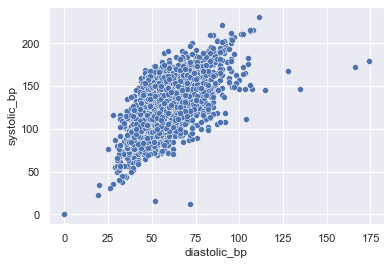

In [40]:
sns.scatterplot(x="diastolic_bp", y="systolic_bp", data=bp)

#### Discussion
Just like the lab results from earlier, some of these the systolic and diastolic values are missing. With the glucose labs we decided that missing values of `flag` meant that the test the test results were normal. What do you think is the most likely cause of blood pressure values being missing? What are some options for dealing with these missing values?

In [52]:
# RUN CELL TO SEE QUIZ
quiz_missing_bp

### Option 1: Drop rows with missing values
One thing we can do is ismply drop any row that is misisng a blood pressure measurement. We can do this using the `dropna()` method. You can specify the columns in which to look for missing values by using the `subset` argument:

```python
df = df.dropna(subset=column_name)
```

#### TODO
Create a new dataframe called `bp2` which has dropped any row which is missing `systolic_bp` or `diastolic_bp`.

In [56]:
bp2 = bp.dropna(subset=["systolic_bp", "diastolic_bp"])

### Option 2: Imputing missing values with the mean
A second option could be to fill in the missing values with the sample mean. This allows us to avoid dropping these rows so we can keep these rows in our dataset. However, make sure to note in your analysis how your are treating these missing values!

#### TODO
Fill in missing rows of `systolic_bp` and `diastolic_bp` with their respective means. This is a similar process to what we did with the `flag` column above, but we need to first calculate the value we'll be using to replace missing values.

In [64]:
bp[["systolic_bp", "diastolic_bp"]] = bp[["systolic_bp", "diastolic_bp"]].fillna(bp[["systolic_bp", "diastolic_bp"]].mean())

In [65]:
bp[["systolic_bp", "diastolic_bp"]]

,systolic_bp,diastolic_bp
0,139.00000,46.00000
1,120.62623,56.65957
2,120.62623,56.65957
3,0.00000,0.00000
4,78.00000,49.00000
...,...,...
4995,110.00000,55.00000
4996,100.00000,53.00000
4997,118.00000,60.00000
4998,119.00000,66.00000
